In [29]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import datetime
import joblib

import matplotlib.pyplot as plt

In [30]:
# Create a unique run name with timestamp
current_time = datetime.datetime.now().strftime('%b%d_%H-%M-%S')
writer = SummaryWriter(f'runs/LSTM_trajectory_prediction_{current_time}')

In [31]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [32]:
loaded_data = joblib.load('uncertainty_robot_trajectories_5000.pkl')

# Access the data
robot2_mean_all = loaded_data["robot2"]["mean_trajectories"]
robot2_std_all = loaded_data["robot2"]["std_trajectories"]
robot3_mean_all = loaded_data["robot3"]["mean_trajectories"]
robot3_std_all = loaded_data["robot3"]["std_trajectories"]

In [33]:
robot2_mean_all[0][:,0]

array([ 8.14027948e+00,  8.04842871e+00,  7.95663879e+00,  7.86508144e+00,
        7.77341538e+00,  7.68181501e+00,  7.59014143e+00,  7.49824871e+00,
        7.40682364e+00,  7.31574725e+00,  7.22464652e+00,  7.13333287e+00,
        7.04185895e+00,  6.95073052e+00,  6.86014883e+00,  6.77004261e+00,
        6.67905019e+00,  6.58808148e+00,  6.49729960e+00,  6.40710002e+00,
        6.31681712e+00,  6.22693046e+00,  6.13688877e+00,  6.04680346e+00,
        5.95728287e+00,  5.86793345e+00,  5.77835016e+00,  5.68879841e+00,
        5.59971719e+00,  5.51072680e+00,  5.42183567e+00,  5.33357462e+00,
        5.24561657e+00,  5.15720555e+00,  5.06868755e+00,  4.98074918e+00,
        4.89331398e+00,  4.80547297e+00,  4.71815695e+00,  4.63030341e+00,
        4.54283351e+00,  4.45588114e+00,  4.36935568e+00,  4.28337415e+00,
        4.19718746e+00,  4.11129835e+00,  4.02600202e+00,  3.94096238e+00,
        3.85583708e+00,  3.77153039e+00,  3.68673332e+00,  3.60297758e+00,
        3.51971686e+00,  

In [34]:
max_len = 0
max_i = 1e5

for i, lst in enumerate(robot2_mean_all):
    if len(lst) > max_len:
        max_len = len(lst)
        max_i = i

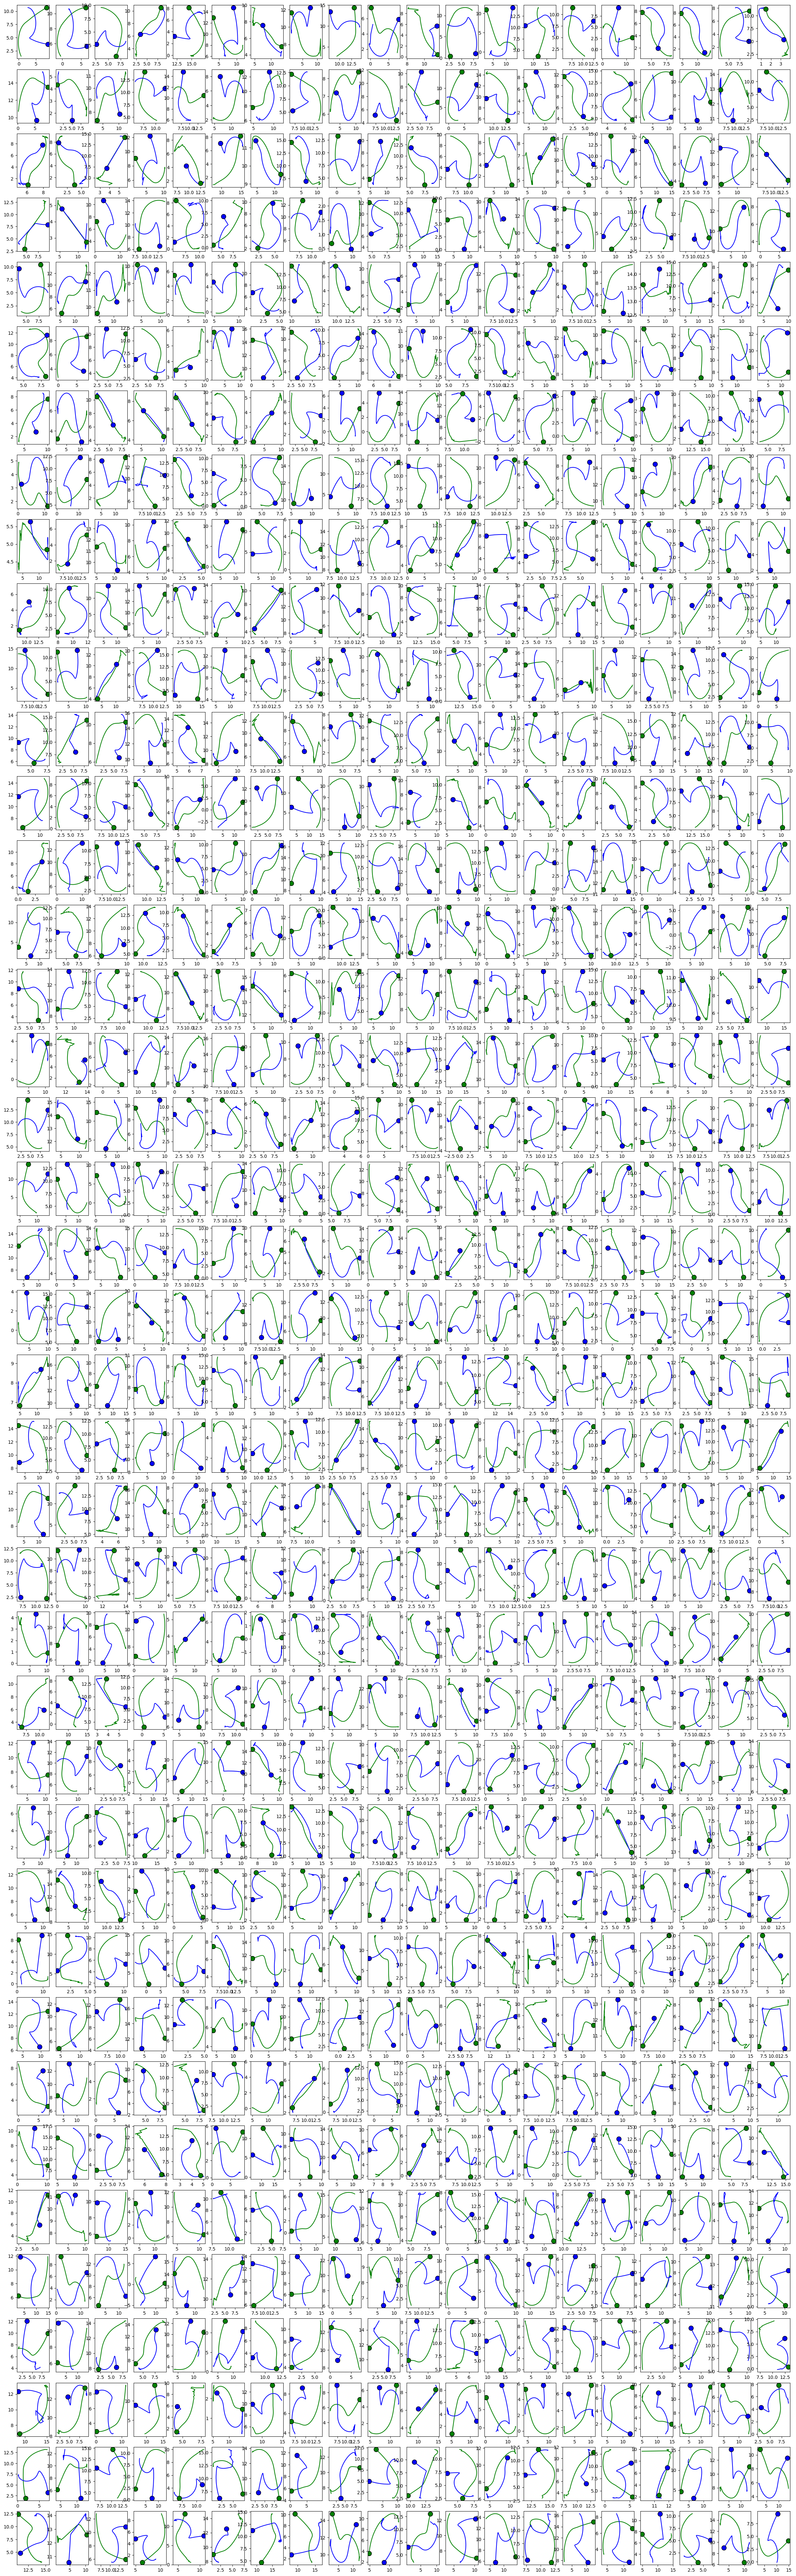

In [39]:
fig, ax = plt.subplots(40,20, figsize = (30,100))
ax = ax.flatten()
for i in range(800):
    ax[i].plot(robot2_mean_all[i][:,0], robot2_mean_all[i][:,1], color = 'g')
    ax[i].plot(robot3_mean_all[i][:,0], robot3_mean_all[i][:,1], color = 'b')
    ax[i].plot(robot2_mean_all[i][0,0], robot2_mean_all[i][0,1], 'ko', markersize=10, markerfacecolor='g')
    ax[i].plot(robot3_mean_all[i][0,0], robot3_mean_all[i][0,1], 'ko', markersize=10, markerfacecolor='b')
plt.show()